In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# conda install -c conda keras==2.1.2

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from MNIST_helper import plot_numbers

Using TensorFlow backend.


In [4]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'
x_test_ = np.load(folder+'test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)
x_test = x_test_.reshape(x_test_.shape + (1,))
y_test_categorical = to_categorical(y_test[:,0])

In [5]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x.shape

(60000, 28, 28)

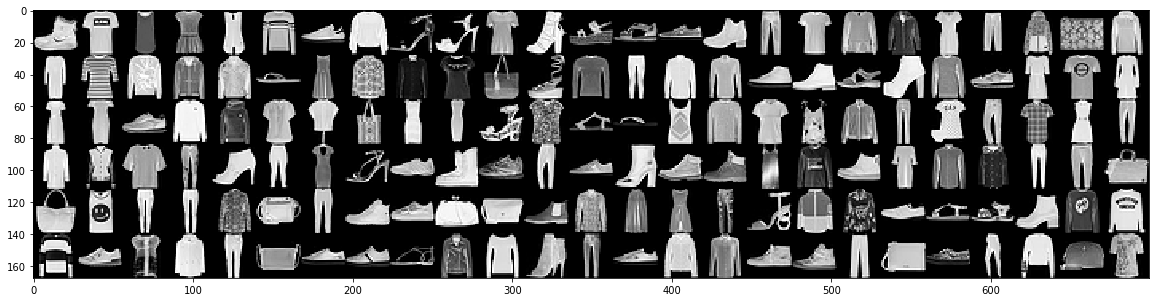

In [6]:
plot_numbers(x.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

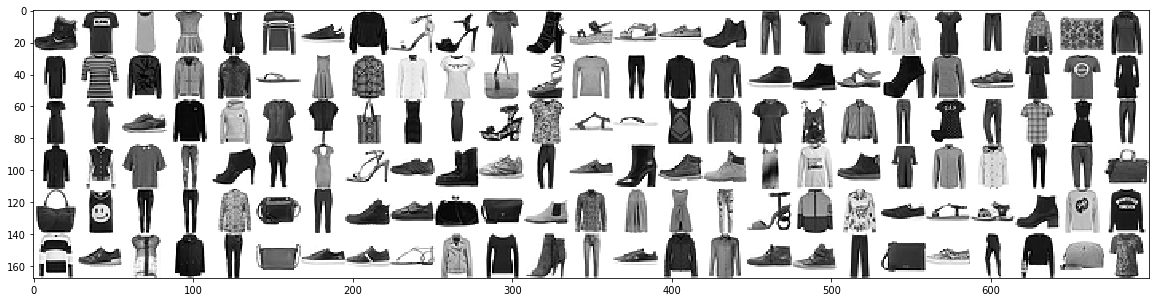

In [7]:
plot_numbers(255-x.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

In [8]:
x_test_ = np.load(folder+'test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)
x_train_, x_valid_, y_train_, y_valid = train_test_split(x, y, test_size = 0.1)

# Reshape para convolucionales

In [9]:
x_train__ = x_train_.reshape(x_train_.shape + (1,))
x_valid = x_valid_.reshape(x_valid_.shape + (1,))
x_test = x_test_.reshape(x_test_.shape + (1,))

In [10]:
x_train_2 = (255-x_train__.reshape(-1,28,28)).reshape(-1,28,28,1)
print(x_train__.shape)
print(x_train_2.shape)
print(y_train_.shape)

(54000, 28, 28, 1)
(54000, 28, 28, 1)
(54000,)


In [43]:
x_train_pre = np.vstack([x_train__, x_train_2])
y_train_pre = np.hstack([y_train_, y_train_])
print(x_train_pre.shape)
print(y_train_pre.shape)

(108000, 28, 28, 1)
(108000,)


In [44]:
x_train_fliped = np.flip(x_train_pre, axis=2)

In [46]:
x_train = np.vstack([x_train_pre, x_train_fliped])
y_train = np.hstack([y_train_pre, y_train_pre])
print(x_train.shape)
print(y_train.shape)

(216000, 28, 28, 1)
(216000,)


In [48]:
x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size = 0.0)

In [49]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)
y_test_categorical = to_categorical(y_test[:,0])

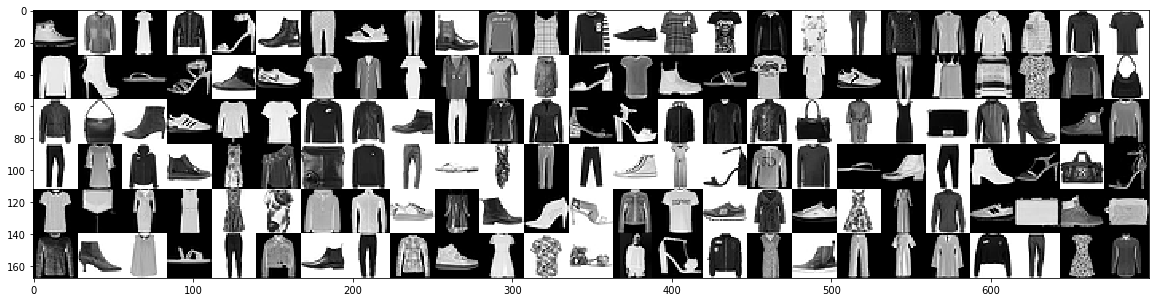

In [50]:
plot_numbers(x_train.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

In [51]:
from cnn_models import get_model, get_model_2, get_model_3, get_model_4, get_model_5

In [52]:
from keras import optimizers

In [53]:
adam = optimizers.Adam(lr=0.001, decay=0.00001) #decay=1e-4

In [54]:
model_1 = get_model()
model_1.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_1.load_weights('cnn-1.hdf5')
model_1.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 7s 722us/step


[0.21586907600164412, 0.92659999999999998]

In [55]:
model_2 = get_model_2()
model_2.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_2.load_weights('cnn-2.hdf5')
model_2.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 5s 549us/step


[0.21623372276425362, 0.92659999999999998]

In [56]:
model_3 = get_model_3(p=0.1)
model_3.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_3.load_weights('cnn-3-3.hdf5')
#model_3.summary()
#model_3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 6s 594us/step


[0.21178007062971593, 0.92459999999999998]

In [57]:
model_5 = get_model_5()
model_5.load_weights('cnn-5.hdf5')
#model_5.summary()
model_5.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_5.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 13s 1ms/step


[0.18580493946671486, 0.93300000000000005]

In [58]:
from keras.callbacks import ModelCheckpoint 
#from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
#from keras import initializers
from fnn_helper import PlotLosses
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
#from keras.layers.normalization import BatchNormalization
#from keras import optimizers
#from keras.utils import np_utils

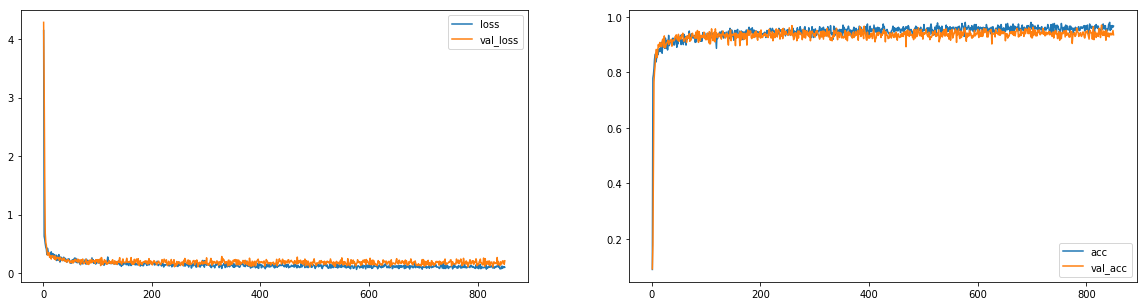

Epoch 00170: val_acc did not improve
216000/216000 [==============================] - 698s 3ms/step - loss: 0.1054 - acc: 0.9603 - val_loss: 0.1831 - val_acc: 0.9378
Epoch 171/500
 17408/216000 [=>............................] - ETA: 10:03 - loss: 0.1040 - acc: 0.9620

In [ ]:
model_1 = get_model_5(pd=0.3, pc=0.2)
adam = optimizers.Adam(lr=0.002, decay=0.00001) #decay=1e-4
model_1.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=100, x_val=x_valid, y_val_categorical=y_val_categorical)
checkpointer = ModelCheckpoint(filepath='cnn-test.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
model_1.fit(x_train, 
          y_train_categorical,
          epochs=500, batch_size=512, 
          #verbose=1, 
          validation_data=(x_valid, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )

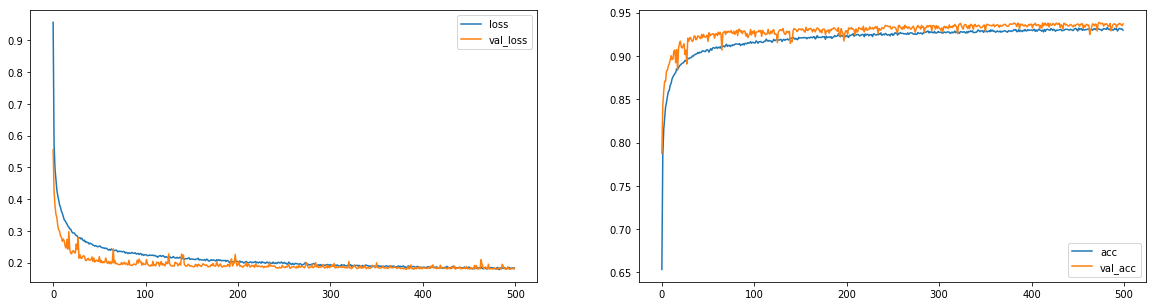


Epoch 00500: val_acc did not improve


In [31]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_valid, y_val_categorical=y_val_categorical)
checkpointer = ModelCheckpoint(filepath='cnn.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
model_3.fit(x_train, 
          y_train_categorical,
          epochs=500, batch_size=256, 
          #verbose=1, 
          validation_data=(x_valid, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )